In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
import pandas as pd
import pandas_datareader.data as web
from math import e
from scipy.stats import norm

# Monte Carlo Simulation

## Abstract
Risk analysis is part of every decision we make. We are constantly faced with uncertainty, ambiguity, and variability. And even though we have unprecedented access to information, we can’t accurately predict the future. Monte Carlo simulation (also known as the Monte Carlo Method) lets you see all the possible outcomes of your decisions and assess the impact of risk, allowing for better decision making under uncertainty.

## Simulation
Simulation statistics is using artificially generate data in order to test out a hypothesis or statistical method. Whenever a new statistical method is developed or used, there are assumptions that need to be tested and confirmed. Statisticians use simulated data to test them out.

There are several advantages to using simulated data. First, it is cheap because it uses random numbers generated rather than data that are collected. Second, it is much faster than traditional data collection, so tests can be run more quickly. Best of all, if the hypothesis or model is pretty solid, then the results of simulation statistics can approximate real results.

Although different statistical tests require a slightly different method to generate simulation statistics, all simulation models follow the same general seven steps:

**Define outcomes**
* before we even move the mouse on our data generator, we have to define which outcomes we expect.

**Calculate the probability of the desired outcome**
* in many cases in statistics, a probability can be tricky to calculate. In all cases, we have to come up with a probability of the desired outcome.

**Generate random numbers**
* in the very best statistics, randomness is actually desirable because if there is a pattern, then it sticks out. To simulate data, we come up with values that are randomly generated within our parameters.

**Choose a value**
* now we need to observe the random numbers and record how many times the desired outcome occurs.

**Analyze the data for patterns**
* at this point, we have our data set and we have noted the number of desired outcomes.

**Let's see this example**

Two unbiased dice are thrown once and the total score is observed. We will use a simulation to find the estimated probability that the total score is even or greater than 7.

The probability of rolling even or greater than 7 are 24 out of 36 possible cases.

$$ P(A) = \frac{m}{n} = \frac{24}{36} \approx 0.66 \% $$

Let's start with the simulation. We will first write a method that rolls dice $N$ times, sums the values, stores them in a variable, and returns them as a result.


In [3]:
def roll_dice(n_simulations):
    dice_sums = []
    
    for i in range(n_simulations):
        die_one = random.randint(1,6)
        die_two = random.randint(1,6)
        sum_of_dice = die_one + die_two
        
        dice_sums.append(sum_of_dice)
        
    return dice_sums

Now let's test the method.

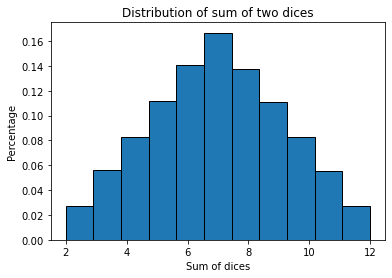

In [4]:
n_simulations = 100000
dice_sums = roll_dice(n_simulations)
probabilities = np.ones_like(dice_sums)/len(dice_sums)

plt.hist(dice_sums, weights=probabilities, bins=11, ec="black")
plt.title("Distribution of sum of two dices")
plt.xlabel("Sum of dices")
plt.ylabel("Percentage")
plt.show()

From looking at the above graph, we would expect that the probability of an even number or greater than 7 would be larger than 50%. So now, lets write code to do this, and calculate out the actual percentage.

In [5]:
def calculate_probability(dice_sums, n_simulations):
    count = 0
    for sum in dice_sums:
        if sum % 2 == 0 or sum > 7:
            count += 1
    
    return count/n_simulations    

Let's use the written method to calculate the probability that the sum of the two dice is an even number or greater than 7.

In [6]:
probability = calculate_probability(dice_sums, n_simulations)
string = "The probability of rolling an even number or greather than 7 is:"
print(string, np.round(probability * 100, 2), '% which is very close to 66 %')

The probability of rolling an even number or greather than 7 is: 66.51 % which is very close to 66 %


## Monte Carlo Method

Monte Carlo simulations are used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty in prediction and forecasting models.It can be used to tackle a range of problems in virtually every field such as finance, engineering, supply chain, and science. It is also referred to as a multiple probability simulation.

When faced with significant uncertainty in the process of making a forecast or estimation, rather than just replacing the uncertain variable with a single average number, the Monte Carlo Simulation might prove to be a better solution by using multiple values.

The basis of a Monte Carlo simulation is that the probability of varying outcomes cannot be determined because of random variable interference. Therefore, a Monte Carlo simulation focuses on constantly repeating random samples to achieve certain results.

A Monte Carlo simulation takes the variable that has uncertainty and assigns it a random value. The model is then run and a result is provided. This process is repeated again and again while assigning the variable in question with many different values. Once the simulation is complete, the results are averaged together to provide an estimate.

As is clear in the dice example, this method was used.

A common use of Monte Carlo methods is numeric integration. Let’s say that we want to calculate the following integral:

$$ \int_{0}^{\pi} sin(x)\space dx $$
The solution is:
$$ \int_{0}^{\pi} sin(x)\space dx = (-cos(x))\bigm|_0^\pi = (-cos(\pi)) - (-cos(0)) = 2 $$

Now let's try with code.

In [7]:
def monte_carlo(a, b, function, n_simulations):
    plt_values = []

    for i in range(n_simulations):
        numbers = np.zeros(n_simulations)
        for k in range (len(numbers)):
            numbers[k] = random.uniform(a,b)

        integral = 0.0
        for num in numbers:
            integral += function(num)

        answer = (b-a)/float(n_simulations)*integral
        plt_values.append(answer)
    
    return plt_values


def show_histogram(plt_values):
    plt.title("Distributions of areas calculated")
    plt.hist (plt_values, bins=30, ec="black")
    plt.xlabel("Areas")
    plt.show()
    

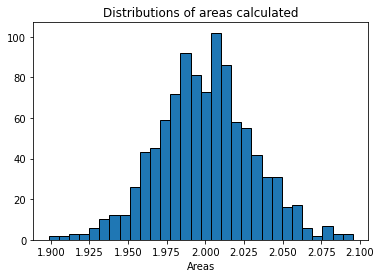

In [8]:
def f(x):
    return np.sin(x)
  
f_values = monte_carlo(0, np.pi, f, 1000)
show_histogram(f_values)

In [9]:
print("The value calculated by monte carlo integration is:", sum(f_values)/len(f_values), "which is very close to 2.")

The value calculated by monte carlo integration is: 1.9997577301252074 which is very close to 2.


Now let's try with this integral:
$$ \int_{5}^{20} \frac{x}{(x+1)^3} \space dx $$
The solution is:
$$ \int_{5}^{20} \frac{x}{(x+1)^3} \space dx = \frac{125}{1176} \approx 0.10629 $$

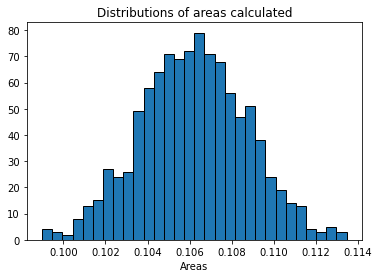

In [10]:
def f2(x):
    return x/(x+1)**3
  
f2_values = monte_carlo(5, 20, f2, 1000)
show_histogram(f2_values)


In [11]:
print("The value calculated by monte carlo integration is:", sum(f2_values)/len(f2_values), "which is very close to 0.10629.")

The value calculated by monte carlo integration is: 0.10618115220680764 which is very close to 0.10629.


Let's see one more interesting example. It appears that the following integral has no analytic solution:

$$ \int_{0}^{\pi} e^{sin(x)}\space dx \approx 6.20876 $$


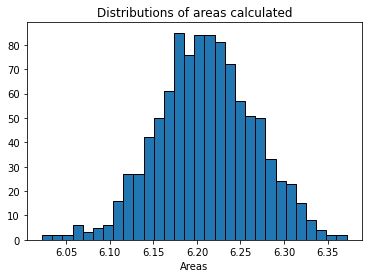

The value calculated by monte carlo integration is: 6.209842670357905 which is very close to 6.20876


In [12]:
def f3(x):
    return e**np.sin(x)

f3_values = monte_carlo(0, np.pi, f3, 1000)
show_histogram(f3_values)
print("The value calculated by monte carlo integration is:", sum(f3_values)/len(f3_values), "which is very close to 6.20876")

As we saw in the example above, the Monte Carlo method allows us to simulate a result when there is no analytical solution.

Let's integrate the same example with the trapezoidal method.

In [13]:
def trapezoidal(a, b, f, n):
    h = (b - a) / n
    integration = f(a) + f(b)
    
    for i in range(1,n):
        k = a + i*h
        integration = integration + 2 * f(k)
    
    integration = integration * h/2
    
    return integration

trapezoidal_integration = trapezoidal(0, np.pi, f3, 1000)
print("Result from trapezoidal method:", round(trapezoidal_integration, 5), "is equal to 6.20876.")

Result from trapezoidal method: 6.20876 is equal to 6.20876.


The Trapezoidal Rule is a much more accurate way to approximate area beneath a curve. To construct the trapezoids, you mark the height of the function at the beginning and end of the width interval, then connect the two points. The accuracy of Monte Carlo methods can only be analyzed from a statistical viewpoint.
Let's compare the execution time of the methods.

In [14]:
start_time = time.time()
monte_carlo(0, np.pi, f3, 1000)
print("Monte Carlo method --- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
trapezoidal(0, np.pi, f3, 1000)
print("Trapezoidal method --- %s seconds ---" % (time.time() - start_time))

Monte Carlo method --- 1.6284289360046387 seconds ---
Trapezoidal method --- 0.0011320114135742188 seconds ---


Тhe Monte Carlo method is significantly slower, as we already know, its power is in the greater number of simulations.

**Now we will explore how Monte Carlo simulations can be applied in practice.** In example, we will see how we can run a simulation when trying to predict the future stock price of a company.

In [15]:
def get_stock_data(stock):
    prices = pd.DataFrame()
    prices[stock] = web.DataReader(stock, "yahoo", '2010-01-01')["Adj Close"]
    
    return prices;

The method above makes a rest call to yahoo and provides us with the necessary data for the simulation. Once we have the data we can start with the simulation. For this purpose we will use the following mathematical formulas: 
$$ R_f = \mu - \frac{2}{1} \sigma^2  $$

$$ R_V = \sigma Z[Random(0;1)]  $$

$$ S_t = S_{t-1}\space e^{(R_f + R_V)} $$

Simulation method calculates the logarithmic return of the stock, the drift ($R_V$), the variance ($R_V$) and daily returns. For the daily returns we have to generate random variables for every day forecasted and for every simulation trial we will run. After that we will calcule the stock price for every trial and return them.

In [16]:
def simulate_stock_prices(prices, n_simulations, num_days):
    
    log_returns = np.log(1 + prices.pct_change())
    u = log_returns.mean()
    var = log_returns.var()
    
    drift = u - (0.5 * var)
    stdev = log_returns.std()
    daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(num_days, n_simulations)))
    
    S0 = prices.iloc[-1]
    
    price_list = np.zeros_like(daily_returns)
    price_list[0] = S0
    
    for d in range(1, num_days):
        price_list[d] = price_list[d - 1] * daily_returns[d]
    
    
    return price_list


Once we are done with the simulation we can visualize the data.

In [17]:
def plot_prices(price_list, stock):
    plt.figure(figsize=(10,5))
    plt.title("Monte Carlo Simulation: " + stock)
    plt.xlabel("Day")
    plt.ylabel("Price")
    plt.plot(price_list)
    plt.axhline(y = price_list[0][0], color = 'r', label="Last price")
    plt.axhline(y = price_list.mean(), color = 'g', label="Mean")
    plt.legend(loc="upper left")
    plt.show()

Let's test our simulation with Tesla stocks for 200 days from today and run 1000 simulations.

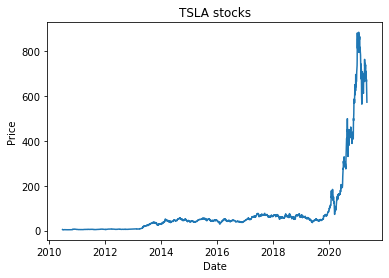

In [18]:
tesla_prices = get_stock_data("TSLA")
plt.plot(tesla_prices)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("TSLA stocks")
plt.show()

We already have the data and can start with our Monte Carlo simulation.

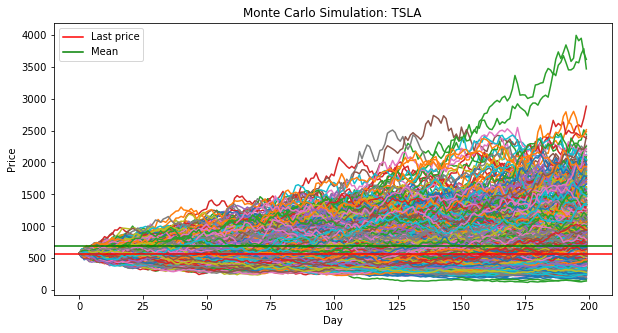

In [19]:
tesla_simulated_prices = simulate_stock_prices(tesla_prices, 1000, 200)
plot_prices(tesla_simulated_prices, "TSLA")

There it goes! We’ve ran a Monte Carlo simulation that predicts Tesla’s stock price 200 days into the future.

In [20]:
print('Maximum Simulated Price : {}'.format(np.max(tesla_simulated_prices)))
print('Minimum Simulated Price : {}'.format(np.min(tesla_simulated_prices)))

print('Last Price : {}'.format(tesla_prices.iloc[-1][0]))

Maximum Simulated Price : 3989.704000087802
Minimum Simulated Price : 122.00535525455452
Last Price : 571.6900024414062


## Conclusion
A Monte Carlo simulation is a useful tool for predicting future results by calculating a formula multiple times with different random inputs. Using numpy and pandas to build a model and generate multiple potential results and analyze them is relatively straightforward. The other added benefit is that analysts can run many scenarios by changing the inputs and can move on to much more sophisticated models in the future if the needs arise. Finally, the results can be shared with non-technical users and facilitate discussions around the uncertainty of the final results.

## References
* https://en.wikipedia.org/wiki/Monte_Carlo_method

* https://www.palisade.com/risk/monte_carlo_simulation.asp

* https://pbpython.com/monte-carlo.html

* https://medium.com/analytics-vidhya/monte-carlo-simulations-for-predicting-stock-prices-python-a64f53585662

* https://www.mathworks.com/matlabcentral/answers/400301-monte-carlo-simulation-in-matlab-two-dices-roll